<h1> Predicting Available Bikes and Available Docks. </h1>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
pl.rcParams.update({'font.size':22,
                    'figure.figsize':(12,6)})

<h2> Examining One Dock. </h2>
- We will randomly pick one dock and explore it's behavior.

In [3]:
dock_df = pd.read_csv('../data/citibike/dock_historical/historical_data.csv', index_col=0)

/home/mark/anaconda3/envs/inapinch/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
dock_df.time = pd.to_datetime(dock_df.time)
dock_df.loc[:, 'hour'] = dock_df.time.dt.hour
dock_df.loc[:, 'weekday'] = dock_df.time.dt.weekday

In [5]:
dock_314 = dock_df.query('dock_id == 314')

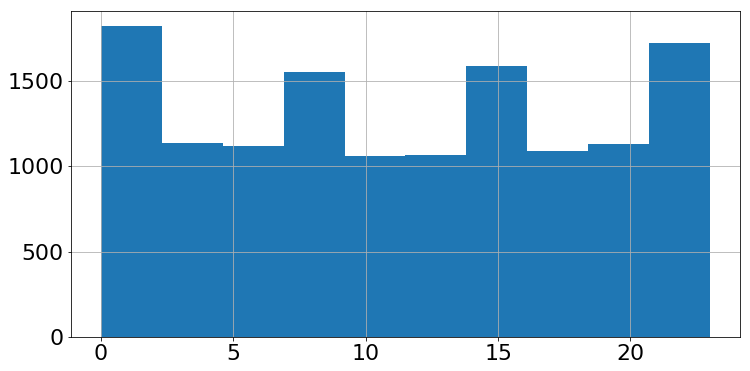

In [6]:
dock_314.hour.hist();

... weird. Shouldn't the representation of hours be constant?

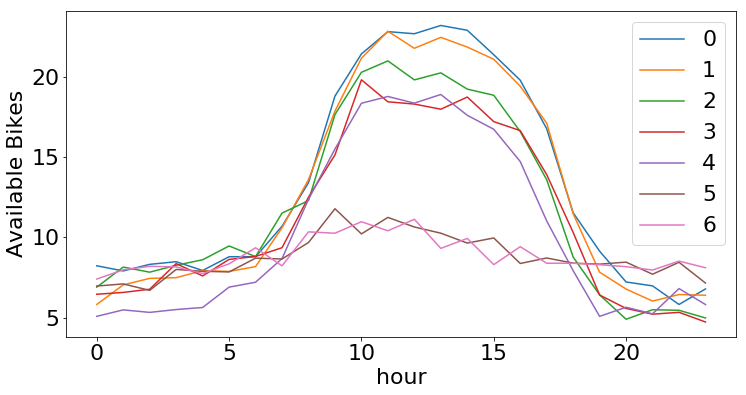

In [7]:
fig, ax = pl.subplots(figsize=(12,6))
for name, group in dock_314.groupby(['weekday']):
    group.groupby('hour')['avail_bikes'].mean().plot(ax=ax, label=name)
ax.legend()
ax.set_ylabel('Available Bikes');

Observations:
- Weekdays are categorically different than the weekend.
- The peak number of available bikes essentially decreases from Monday - Friday.

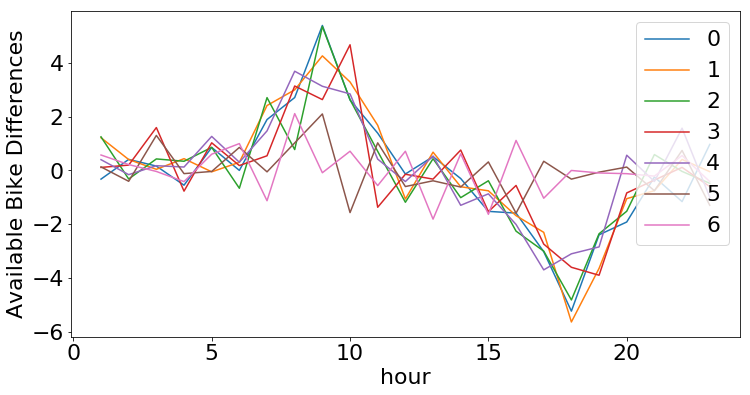

In [8]:
fig, ax = pl.subplots(figsize=(12,6))
for name, group in dock_314.groupby(['weekday']):
    group.groupby('hour')['avail_bikes'].mean().diff(periods=1).plot(ax=ax, label=name)
ax.legend()
ax.set_ylabel('Available Bike Differences');

Differencing the available bikes once doesn't produce a stationary process.

(0, 39)

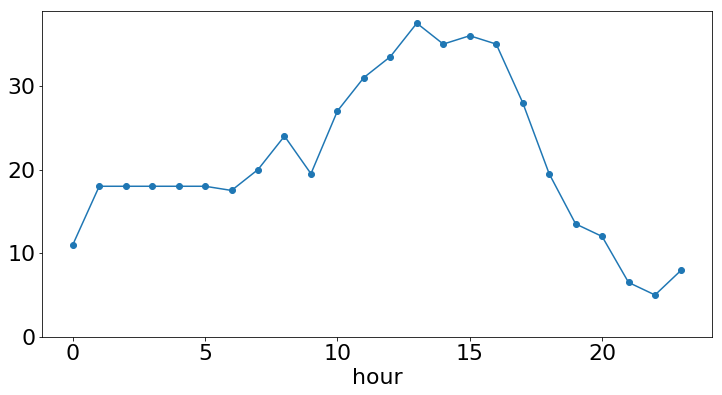

In [12]:
fig, ax = pl.subplots()
dock_df.query('dock_id == 314 and time.dt.dayofyear == 122 and time.dt.year == 2018').groupby('hour')['avail_bikes'].mean().plot(marker = 'o', ax = ax, linestyle='-')
ax.set_ylim(0, 39)


<h2> Using a Naive Model. </h2>

Let X_t be the number of bikes in a certain PUMA. Let's use the Naive model of no change in order to set a base line.

<h2> Using Logistic Regression and Random forest to predict the next time series values. </h2>

TODO: 
- Resample time to be regularly spaced.
- Start with just one dock.
- Correct time.. the 12 hour thing set many dates back 1.
- data is actually taken once an hour... (interpolate?)
- Do a temporal split on the data.
- Predict percentage of bikes available or percentage of docks available.
- Look at Autocorrelation function.

<h2> Feature Engineering. </h2>

Features to try:
- X_t
- X_{t-1} ...
- Humidity
- Temperature
- Precipitation
- Snow
- Time of day (possibly as a cosine)
- Day of week (possibly as a cosine)
- Week of year (possibly as a cosine)
- Census divied up by zipcode
- Parade data (if possible)
- Proximity to Subway station.
- Proximity to School.

In [40]:
# Adding puma id to the data frame.
station_df = pd.read_csv('../data/citibike/citibike_stations_puma.csv', index_col=0)

In [44]:
station_df.shape

(811, 19)

In [49]:
len(set(station_df.id).intersection(set(dock_df.dock_id)))

648

In [45]:
dock_df.dock_id.unique().shape[0]

733

In [25]:
station_df = station_df[~station_df.PUMA.isnull()]
station_df.PUMA = station_df.PUMA.astype(int)

In [33]:
puma_dict = dict(station_df[['id', 'PUMA']].values)

In [39]:
puma_dict[116]

KeyError: 116

In [38]:
dock_df['PUMA'] = dock_df['dock_id'].apply(lambda x: puma_dict[x])

KeyError: 116

dock_df['PUMA'] = dock_df['id'].apply(puma_dict)